# Практика

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
from statsmodels.stats.weightstats import _zconfint_generic
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# Решил выбрать бета распределение, т.к. у нее необычная функция плотности (можно сделать подкову)
beta_rv = sts.beta(0.5, 0.5)
sample = beta_rv.rvs(100)
sample

array([4.61160560e-02, 9.96278755e-01, 4.44574863e-02, 8.12298822e-01,
       9.97992632e-01, 2.31110649e-01, 8.11368143e-01, 6.82681786e-01,
       2.51407650e-01, 2.44772708e-01, 2.98160187e-01, 8.44186473e-01,
       1.59542186e-01, 1.47869955e-01, 1.76525673e-03, 9.98589873e-01,
       7.50604163e-02, 2.18209296e-01, 1.06039009e-01, 3.54749052e-04,
       7.07234387e-01, 5.60760655e-01, 5.66175296e-01, 8.76683160e-01,
       2.19701282e-01, 6.15689522e-02, 8.94048486e-01, 1.11441310e-02,
       1.72426278e-01, 9.81474131e-01, 1.42258832e-01, 3.81884633e-01,
       5.18424746e-01, 1.90580947e-01, 3.12998687e-02, 3.84035824e-02,
       3.17239839e-01, 7.99107591e-02, 6.55317531e-01, 7.67797613e-01,
       6.29304882e-01, 5.14236466e-01, 9.70936360e-01, 3.36872833e-02,
       1.05740960e-02, 7.81844754e-01, 9.99777494e-01, 7.02235619e-04,
       6.02282650e-01, 9.21499791e-01, 5.89596119e-03, 9.95843008e-01,
       6.16232853e-02, 8.29674667e-01, 4.44971088e-01, 8.89890592e-01,
      

In [6]:
# настоящее среднее случайной величины
real_mean = beta_rv.mean()
print(real_mean)
# настоящая дисперсия случайной величины
real_var = beta_rv.var()
print(real_var)

0.5
0.125


### Постройте гистограмму выборки и теоретическую плотность распределения

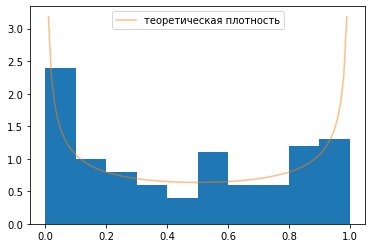

In [3]:
plt.hist(sample, density=True)
x = np.linspace(0, 1, 100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

#### Как видим распределение не имеет моды и вероятности сконцентрированы около нуля и единицы

In [5]:
sample_mean = sample.mean()  # выборочное среднее
print(sample_mean)
sample_var = sample.var()  # выборочная дисперсия
print(sample_var)

0.4529741022629441
0.11889270408657332


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

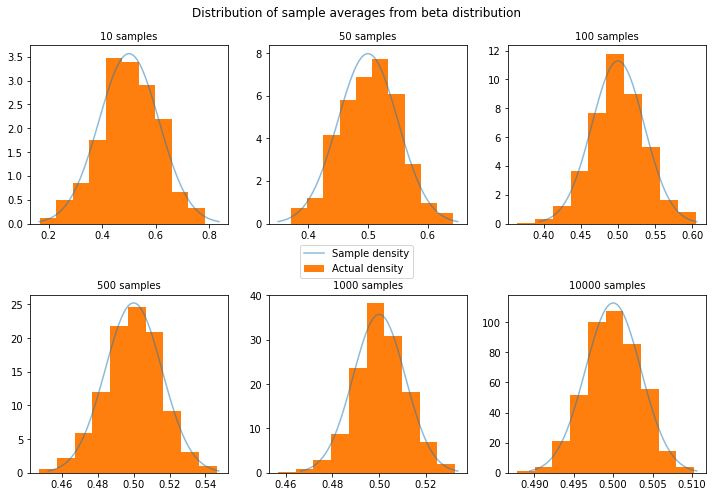

In [7]:
N = [10, 50, 100, 500, 1000, 10000]
fig, axes = plt.subplots(figsize=(10, 7), nrows=2, ncols=3, )
for n, ax in zip(N, axes.flat):
    means = []
    for i in range(1000):
        means.append(np.mean(beta_rv.rvs(n)))
    
    # делаем диапазон для x в 3 сигмы
    three_sigma = 3 * (real_var / n)**0.5
    x = np.linspace(real_mean - three_sigma, real_mean + three_sigma, 100)
    
    pdf = sts.norm(loc=real_mean, scale=(real_var / n)**0.5).pdf(x)
    ax.plot(x, pdf, label='Sample density', alpha=0.5)
    ax.hist(means, density=True, label='Actual density')
    ax.set_title(f'{str(n)} samples', size='medium')
# Добавляем одну легенду для всех графиков
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0, 0, 1, 0.95))
# Добавляет название графика
fig.suptitle('Distribution of sample averages from beta distribution')
# Делаем место для легенды
plt.tight_layout(h_pad=4.0)

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

_Даже начиная с выборки размера 10 выборочное среднее ведет себя как нормальная величина._

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [8]:
# загружаем из альтернативного хранилища, т.к. со Сбера не получилось подключиться к google drive
url = 'https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv'
df = pd.read_csv(url)
data = df[['total day calls', 'churn']]

In [9]:
# Подготавливаем параметры распределения дневных звонков
result = data.groupby(['churn']).mean()
result.columns = ['mean']
result['variance'] = data.groupby(['churn']).var()  # default value is ddof=1
result['count'] = data.groupby(['churn']).count()
# Уровень значимости
alpha = 0.05

In [11]:
# Функция для расчета сдвига от среднего по явной формуле
def shift(alpha, var, n):
    z = sts.norm().ppf(1 - alpha / 2)
    return z * (var / n)**0.5

# Вспомогательная функция, которую можно применить к датафрейму
def f(df):
    return shift(alpha, df['variance'], df['count'])

In [12]:
# Считаем доверительный интервал с уровнем значимости 0.05
result['lower'] = result['mean'] - result.apply(f, axis=1)
result['upper'] = result['mean'] + result.apply(f, axis=1)
answer = result[['lower', 'mean', 'upper']]

In [13]:
# Вспомогательные функции на основе библиотеки statsmodels
def lower(df):
    std = (df['variance'] / df['count'])**0.5
    return _zconfint_generic(df['mean'], std, alpha, 'two-sided')[0]


def upper(df):
    std = (df['variance'] / df['count'])**0.5
    return _zconfint_generic(df['mean'], std, alpha, 'two-sided')[1]

In [14]:
# Считаем доверительный интервал с уровнем значимости 0.05
result2 = result[['mean', 'variance', 'count']]
result2['lower'] = result2.apply(lower, axis=1)
result2['upper'] = result2.apply(upper, axis=1)
answer2 = result[['lower', 'mean', 'upper']]

<ipython-input-14-9f7da36f04e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result2['lower'] = result2.apply(lower, axis=1)


In [15]:
# Сравниваем два способа
print(answer)
print(answer2)

           lower        mean       upper
churn                                   
False  99.556188  100.283158  101.010127
True   99.410662  101.335404  103.260145
           lower        mean       upper
churn                                   
False  99.556188  100.283158  101.010127
True   99.410662  101.335404  103.260145


_Как видим оба способа дали одинаковый результат_

_Вне зависимости от того ушел ли клиент или остался среднее время дневных разговоров около 100 минут_